## Question 1

**Noise Reduction:**
 
**A)** Read the image 'bridge.gif'. Filter the images using the masks of of 3x3, 5x5 and 7x7. How does the size of the mask affect blurring and noise reduction? Which do you think provides a better tradeoff between blurring and noise reduction for this image?

**B)** Sharpen the 3x3 blurred image by convolving with the Laplacian mask

0 -1 0  
-1 5 -1     
0 -1 0  
Display and submit. Does this operation reduce the blurring? What about the original noise? You might need to rescale this image after convolving to make the effect more visible and to make the contrast more pleasing.

**C)** Apply a second sharpening step as in (B). Display and submit. Would repeated sharpening help image interpretation? Again, rescaling will be needed to see the effect.

In [12]:
from PIL import Image, ImageFilter
import cv2
import numpy as np

# A) Read the image using Pillow
image_path = 'bridge.GIF'
image = Image.open(image_path).convert('L')  # Convert to grayscale

# Convert Pillow image to NumPy array
image_np = np.array(image)

# Apply Gaussian blur with different kernel sizes using OpenCV
blurred_3x3_cv2 = cv2.GaussianBlur(image_np, (3, 3), 0)
(Image.fromarray(blurred_3x3_cv2, mode="L")).save("blurred_3x3.png")

blurred_5x5_cv2 = cv2.GaussianBlur(image_np, (5, 5), 0)
(Image.fromarray(blurred_5x5_cv2, mode="L")).save("blurred_5x5.png")

blurred_7x7_cv2 = cv2.GaussianBlur(image_np, (7, 7), 0)
(Image.fromarray(blurred_7x7_cv2, mode="L")).save("blurred_7x7.png")

# Convert back to Pillow Image for display
blurred_3x3= Image.fromarray(blurred_3x3_cv2)
blurred_5x5 = Image.fromarray(blurred_5x5_cv2)
blurred_7x7 = Image.fromarray(blurred_7x7_cv2)

# Display the images
blurred_3x3.show(title='Blurred 3x3')
blurred_5x5.show(title='Blurred 5x5')
blurred_7x7.show(title='Blurred 7x7')

# B) Sharpen the 3x3 blurred image using OpenCV
laplacian_mask = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]], dtype=np.float32)
sharpened_3x3_cv2 = cv2.filter2D(blurred_3x3_cv2, -1, laplacian_mask)

# Convert back to Pillow Image for display
sharpened_3x3 = Image.fromarray(sharpened_3x3_cv2)

# Display the sharpened image
sharpened_3x3.show(title='Sharpened 3x3')
sharpened_3x3.save("Sharpened_3x3.png")
# C) Apply a second sharpening step using OpenCV
sharpened_2_cv2 = cv2.filter2D(sharpened_3x3_cv2, -1, laplacian_mask)

# Convert back to Pillow Image for display
sharpened_2 = Image.fromarray(sharpened_2_cv2)

# Display the doubly sharpened image
sharpened_2.show(title='Doubly Sharpened')
sharpened_2.save("sharpened_2.png")


In [ ]:
import cv2
import numpy as np
from PIL import Image, ImageFilter
# Read the image
image_path = 'bridge.gif'
image = Image.open(image_path).convert('L')

# Apply Gaussian blur with different kernel sizes
blurred_3x3 = cv2.GaussianBlur(image, (3, 3), 0)
blurred_5x5 = cv2.GaussianBlur(image, (5, 5), 0)
blurred_7x7 = cv2.GaussianBlur(image, (7, 7), 0)

# Display the images
cv2.imshow('Original', image)
cv2.imshow('Blurred 3x3', blurred_3x3)
cv2.imshow('Blurred 5x5', blurred_5x5)
cv2.imshow('Blurred 7x7', blurred_7x7)
cv2.waitKey(0)
cv2.destroyAllWindows()

<img src="bridge.gif" width="200" height="200"/>

## Question 2

Noise reduction is a crucial task to enhance the quality of images. You are provided with a noisy grayscale image, 'brain.png,' and your task is to apply noise reduction using two different methods: Median Filtering and Averaging Filtering.

**A)** Describe each of the two methods for noise reduction in images. Explain how they work and their key characteristics in addressing noise.

**B)** Apply noise reduction to the 'brain.png' image using Averaging Filtering. Use different kernel sizes (e.g., 3x3, 5x5, ...) and determine which kernel size offers a better trade-off between blurring and noise reduction for this image.

**C)** Apply noise reduction on the 'brain.png' image using Median Filtering. Use different kernel sizes (e.g., 3x3, 5x5, ...) and compare their results together in a single figure. Based on your observations, which kernel size do you think is better for noise reduction in this image?

**D)** For each of the two methods, discuss their advantages and disadvantages in the context of noise reduction. Consider aspects such as noise removal effectiveness, preservation of image details.

<img src="brain.png" width="200" height="200"/>

In [ ]:
#َQ2-A
#Median filtering is a method for noise reduction in images that works by replacing each pixel's value with the median value of the neighboring pixels. The median filter is effective at removing salt-and-pepper noise, which is a type of noise that causes random bright and dark spots in an image. It works well for this type of noise because the median value is less affected by extreme outlier values, such as those caused by the noise.

#Averaging filtering,replace each pixel's value with the average value of the neighboring pixels.  Averaging filtering is effective at reducing Gaussian noise, which is a type of noise that causes a random variation in brightness across the image. It works well for this type of noise because averaging the neighboring pixel values helps to smooth out the random variations caused by the noise.

#Key characteristics of median filtering include its ability to effectively remove salt-and-pepper noise, while key characteristics of averaging filtering include its ability to reduce Gaussian noise. However, they can also cause loss of image detail and sharpness, particularly in areas with high levels of noise.


In [ ]:
#َQ2-D
#Gaussian filtering is effective in reducing Gaussian noise, which is a type of noise that follows a Gaussian distribution. It is also good at preserving image details while reducing noise. However, it may not be as effective in reducing other types of noise, such as salt-and-pepper noise.

#On the other hand, median filtering is very effective in reducing salt-and-pepper noise, which is a type of noise that randomly turns pixels to black or white. It is also good at preserving edges and fine details in the image. However, it may not be as effective in reducing Gaussian noise.

#In general, Gaussian filtering is better at preserving image details, while median filtering is better at reducing certain types of noise. Depending on the specific type of noise present in the image, one method may be more suitable than the other. In some cases, a combination of both methods may be used to effectively reduce different types of noise while preserving image details.

In [13]:
#Averaging Filtering 
#cv2.boxFilter(src, dst, depth, ksize, anchor, normalize, bordertype)

import cv2
import numpy as np

# Load the input image
path = 'brain.png'
img = cv2.imread(path)

# Apply averaging filtering using cv2.blur() with different kernel sizes
blur_3x3 = cv2.blur(img, (3, 3))
blur_5x5 = cv2.blur(img, (5, 5))
blur_7x7 = cv2.blur(img, (7, 7))

# Apply averaging filtering using cv2.boxFilter() with different kernel sizes
box_3x3 = cv2.boxFilter(img, -1, (3, 3))
box_5x5 = cv2.boxFilter(img, -1, (5, 5))
box_7x7 = cv2.boxFilter(img, -1, (7, 7))

# Display the original image and the filtered images
cv2.imshow('Original Image', img)

cv2.imshow('Blur 3x3', blur_3x3)
cv2.imwrite('Blur 3x3.png', blur_3x3)
cv2.imshow('Blur 5x5', blur_5x5)
cv2.imwrite('Blur 5x5.png', blur_5x5)
cv2.imshow('Blur 7x7', blur_7x7)
cv2.imwrite('Blur 7x7.png', blur_7x7)
cv2.imshow('Box 3x3', box_3x3)
cv2.imwrite('Box 3x3.png', box_3x3)
cv2.imshow('Box 5x5', box_5x5)
cv2.imwrite('Box 5x5.png', box_5x5)
cv2.imshow('Box 7x7', box_7x7)
cv2.imwrite('Box 7x7.png', box_7x7)
# Wait for a key press and then close all windows
cv2.waitKey(0)
cv2.destroyAllWindows()

In [1]:
import cv2
import numpy as np

# Load the input image
path = 'brain.png'
img = cv2.imread(path)

# Apply median filtering using cv2.medianBlur() with different kernel sizes
median_3x3 = cv2.medianBlur(img, 3)
median_5x5 = cv2.medianBlur(img, 5)
median_7x7 = cv2.medianBlur(img, 7)

# Display the original image and the filtered images
cv2.imshow('Original Image', img)
cv2.imshow('Median 3x3', median_3x3)
cv2.imwrite('Median 3x3.png', median_3x3)
cv2.imshow('Median 5x5', median_5x5)
cv2.imwrite('Median 5x5.png', median_5x5)
cv2.imshow('Median 7x7', median_7x7)
cv2.imwrite('Median 7x7.png', median_7x7)

# Wait for a key press and then close all windows
cv2.waitKey(0)
cv2.destroyAllWindows()

## Question 3

The Laplacian and Sobel operators are used for edge detection, the Laplacian operator focuses on second-order derivatives to identify rapid changes in intensity, while the Sobel operator is specifically designed for computing the gradient magnitude, emphasizing edges along the horizontal and vertical directions.

**A)** When would it be more advantageous to employ Sobel edge detection versus Laplacian edge detection in image processing applications?

**B)** Open the image 'Edge.jpg,' apply the Sobel edge detector separately along the x and y dimensions, and then visualize the results for each dimension as well as the combined effect.

**C)** Open the image 'Edge.jpg,' apply the Laplacian edge detector, and display the results for Edge Detection and Magnitude.

**D)** Examine the results of these two methods and figure out which one works better for this task.

<img src="Edge.jpg" width="200" height="200"/>

In [ ]:
#Q3-A
#Sobel edge detection is more advantageous when the image contains a lot of noise, as it applies Gaussian smoothing before taking the gradient, which helps in reducing the effect of noise. On the other hand, Laplacian edge detection is more advantageous when the edges in the image are relatively thick and well-defined.

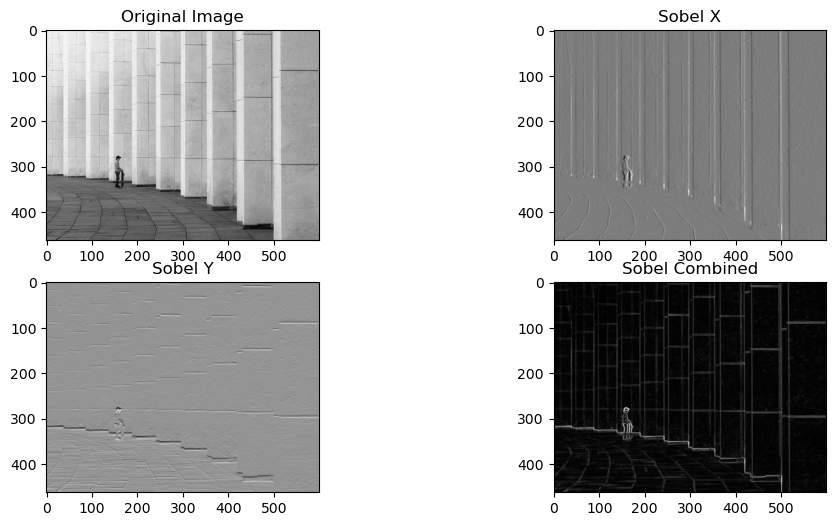

In [1]:
#Q3-B
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the image
image = cv2.imread('Edge.jpg', 0)

# Apply Sobel edge detector along the x dimension
sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=5)

# Apply Sobel edge detector along the y dimension
sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=5)

# Combine the results from both dimensions
sobel_combined = np.sqrt(sobel_x**2 + sobel_y**2)

# Visualize the results
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(2, 2, 2)
plt.imshow(sobel_x, cmap='gray')
plt.title('Sobel X')

plt.subplot(2, 2, 3)
plt.imshow(sobel_y, cmap='gray')
plt.title('Sobel Y')

plt.subplot(2, 2, 4)
plt.imshow(sobel_combined, cmap='gray')
plt.title('Sobel Combined')

plt.show()

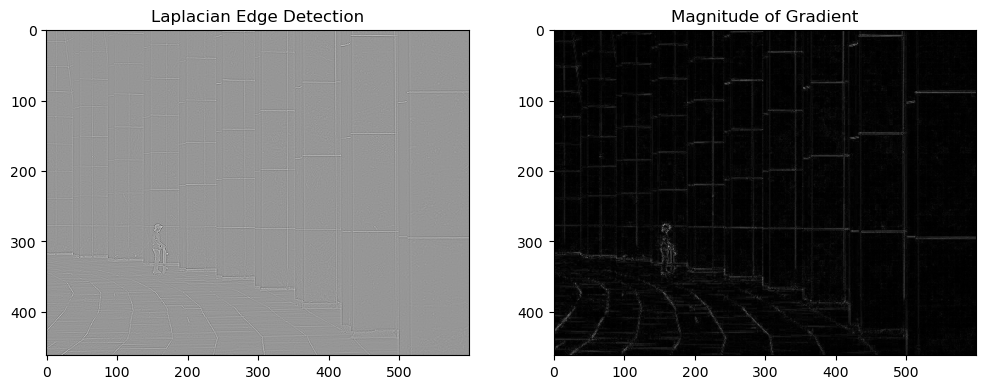

In [2]:
#Q3-C
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the image
image = cv2.imread('Edge.jpg', 0)

# Apply Laplacian edge detector
laplacian = cv2.Laplacian(image, cv2.CV_64F)

# Calculate the magnitude of the gradient
laplacian_magnitude = np.abs(laplacian)

# Visualize the results
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(laplacian, cmap='gray')
plt.title('Laplacian Edge Detection')

plt.subplot(1, 2, 2)
plt.imshow(laplacian_magnitude, cmap='gray')
plt.title('Magnitude of Gradient')

plt.show()

In [ ]:
#Q3-D

# The first subplot shows the result of the Laplacian edge detection, which highlights the edges in the image. The second subplot shows the magnitude of the gradient, which also highlights the edges but with a different visualization.

# In this case, it appears that the Laplacian edge detection method works better for this task as it provides a clearer visualization of the edges in the image. The edges are more distinct and easier to identify compared to the magnitude of the gradient visualization. Therefore, for this particular image, the Laplacian edge detection method seems to be more effective.

## Question 4

In this question, you will explore the Robert-Cross and Prewitt operators, compare their results, and then apply a high-boost filter to undo their effects. Use the image below for this question.

**A)** Briefly explain how Roberts cross-gradient operator works and then apply it on the given image and display the result.

**B)** Briefly explain how Prewitt operator works and then apply it to the given image and display the result.

**C)** Display the original image, the results of the Robert-Cross operator, and the results of the Prewitt operator side by side. 

**D)** Apply a high-boost filter to the images obtained after the Robert-Cross and Prewitt operators. Experiment with different values of 'A' and observe the changes.

**E)** Write a brief discussion on the differences observed between the results of the Roberts cross-gradient and Prewitt operators. Explain how the high-boost filter affects the results of these operators and the significance of the chosen value of ‘A’.

<img src="cat.gif" width="200" height="200"/>

In [ ]:
# A) The Roberts cross-gradient operator works by calculating the gradient of the image using two 2x2 convolution kernels. The first kernel detects diagonal edges, while the second kernel detects the other diagonal edges. The result is a binary image highlighting the edges in the original image.


In [ ]:
# B) The Prewitt operator works by calculating the gradient of the image using two 3x3 convolution kernels. These kernels are designed to detect vertical and horizontal edges in the image. The result is a grayscale image highlighting the edges in the original image.

In [ ]:
from PIL import Image, ImageFilter
import numpy as np
import matplotlib.pyplot as plt

# A) Read the image using Pillow
image_path = 'cat.gif'
image = Image.open(image_path).convert('L')  # Convert to grayscale

# Convert Pillow Image to NumPy array
image_np = np.array(image)

# B) Roberts Cross Operator
roberts_cross_kernel = np.array([[1, 0], [0, -1]])
roberts_result = Image.fromarray(np.abs(cv2.filter2D(image_np, cv2.CV_64F, roberts_cross_kernel)))

# C) Prewitt Operator
prewitt_kernel_x = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
prewitt_kernel_y = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]])
prewitt_result_x = cv2.filter2D(image_np, cv2.CV_64F, prewitt_kernel_x)
prewitt_result_y = cv2.filter2D(image_np, cv2.CV_64F, prewitt_kernel_y)
prewitt_result = Image.fromarray(np.sqrt(prewitt_result_x**2 + prewitt_result_y**2))

# D) Display the original, Roberts, and Prewitt results
plt.subplot(131), plt.imshow(image_np, cmap='gray'), plt.title('Original Image')
plt.subplot(132), plt.imshow(roberts_result, cmap='gray'), plt.title('Roberts Cross Result')
plt.subplot(133), plt.imshow(prewitt_result, cmap='gray'), plt.title('Prewitt Result')
plt.show()


In [ ]:
# Define the high-boost filter function
def high_boost_filter(img, A):
    laplacian = cv2.Laplacian(img, -1)
    enhanced_img = img + A*laplacian
    return enhanced_img

# Apply high-boost filter to the Roberts operator result
roberts_enhanced = high_boost_filter(roberts_result, 2)

# Apply high-boost filter to the Prewitt operator result
prewitt_enhanced = high_boost_filter(prewitt_result, 2)

# Display the enhanced images
plt.figure(figsize=(10, 5))
plt.subplot(121), plt.imshow(roberts_enhanced, cmap='gray'), plt.title('Roberts Operator Enhanced')
plt.subplot(122), plt.imshow(prewitt_enhanced, cmap='gray'), plt.title('Prewitt Operator Enhanced')
plt.show()

In [ ]:
# E) The differences observed between the results of the Roberts cross-gradient and Prewitt operators lie in their detection methods and output. The Roberts operator produces a binary image highlighting diagonal edges, while the Prewitt operator produces a grayscale image highlighting both vertical and horizontal edges.
# The high-boost filter affects the results of these operators by enhancing the edges in the images, making them appear sharper and more defined. The chosen value of ‘A’ will determine the extent of this enhancement, with higher values resulting in more pronounced edges. However, a very high value of ‘A’ can lead to over-enhancement and artifacts in the image. Therefore, it is important to carefully choose the value of ‘A’ based on the specific characteristics of the image and the desired outcome.

## Question 5

To achieve successful image enhancement, it is often ineffective to rely on a single operation. Instead, a combination of techniques is utilized to attain the desired final result. Please open the image 'skeleton.png' and apply the enhancement methods you have already learned, incorporating spatial enhancement techniques.

**A)** Open the image 'skeleton.png,' apply your desired enhancement methods to achieve the best visibility of the bones. Explain your methods and why you chose them.

**B)** Compare the original image with your enhanced version in a single figure, illustrating them before and after enhancement.

<img src="skeleton.png" width="200" height="200"/>

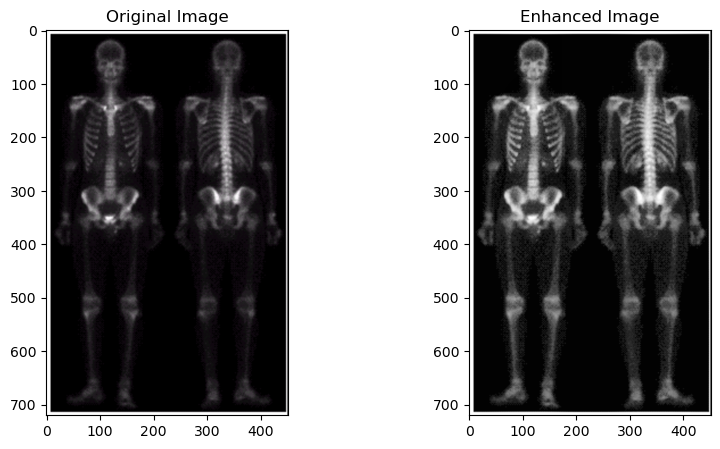

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Read the original image
original_image_path = 'skeleton.png'
original_image = cv2.imread(original_image_path)

# Step 2: Convert the original image to grayscale
gray_original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)

# Step 3: Apply adaptive histogram equalization to the entire image
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
enhanced_image = clahe.apply(gray_original_image)

# Step 4: Display the original and enhanced images
plt.figure(figsize=(10, 5))
plt.subplot(121), plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)), plt.title('Original Image')
plt.subplot(122), plt.imshow(enhanced_image, cmap='gray'), plt.title('Enhanced Image')
plt.show()